In [1]:
import numpy as np
import gc
import matplotlib.pyplot as plt
from sksfa import SFA
from sklearn.preprocessing import StandardScaler

In [5]:
data = np.load('data/data_squareRoom.npy')
crop_h = 20
crop_w = 10
dim_step= 1
data = data[:, crop_h:-crop_h, crop_w:-crop_w][:, ::dim_step][:, :, ::dim_step]
gc.collect()
print(data.shape)

(22000, 30, 190, 3)


In [6]:
images = [x.flatten() for x in data[:2000]]
scaler = StandardScaler()
images_std = scaler.fit_transform(images)
sfa = SFA(n_components=3)
slow_features = sfa.fit_transform(images)

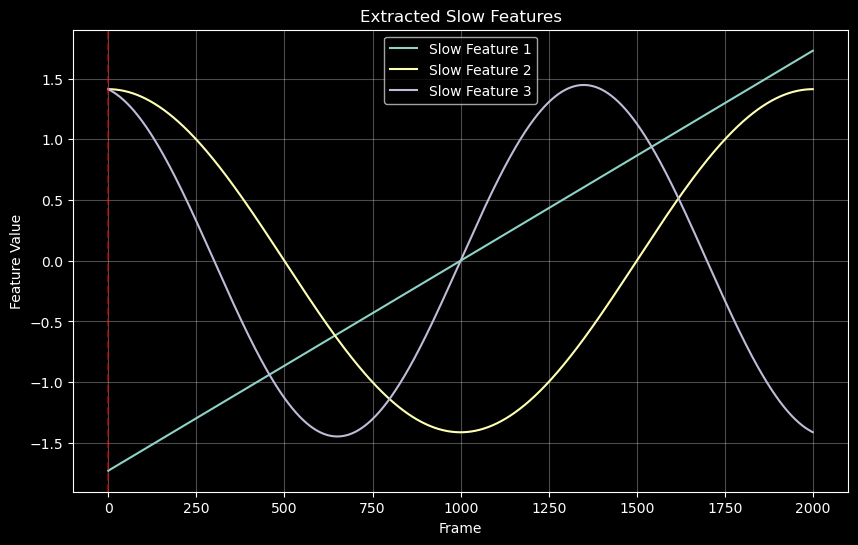

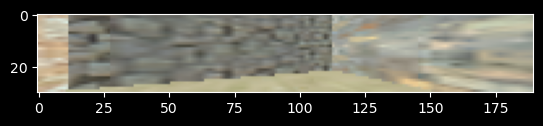

In [7]:
plt.ion()
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

index = 0

ax.plot(slow_features[:, 0], label="Slow Feature 1")
ax.plot(slow_features[:, 1], label="Slow Feature 2")
ax.plot(slow_features[:, 2], label="Slow Feature 3")
ax.legend()
ax.grid(alpha=.3)
hline = ax.axvline(index, c='r', alpha=.5, linestyle='--')
plt.title("Extracted Slow Features")
plt.xlabel("Frame")
plt.ylabel("Feature Value")

plt.figure()
displayedImage = plt.imshow(data[index])

plt.show()